<font color='orange'>**Please create your own copy before starting modification**</font>

Dependencies: Add Your dependencies here



In [ ]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Load the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/priject1/lab5/train.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Plot the count for each target

Count of trget value 1:  3271
Count of trget value 0:  4342


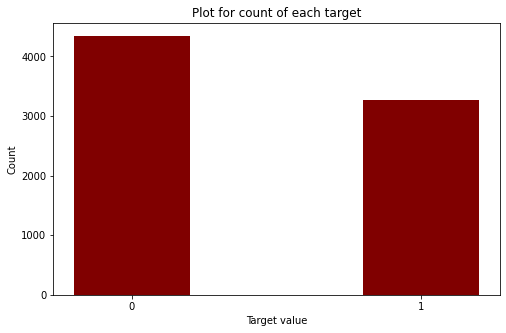

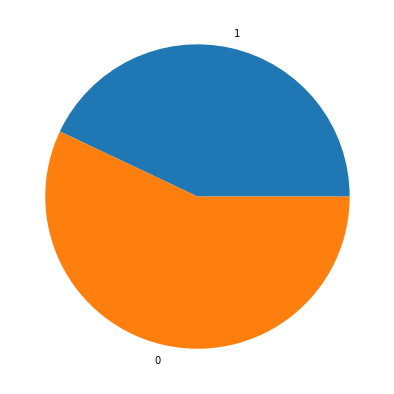

In [ ]:
count1=count2=0
for i in df["target"]:
  if i == 1:
    count1 += 1
  else:
    count2 += 1
print("Count of trget value 1: ", count1)
print("Count of trget value 0: ", count2)

data = {'0':count2, '1':count1}
target = list(data.keys())
count = list(data.values())
  
fig = plt.figure(figsize = (8, 5))
plt.bar(target, count, color ='maroon',
        width = 0.4)
plt.xlabel("Target value")
plt.ylabel("Count")
plt.title("Plot for count of each target")
plt.show()

fig = plt.figure(figsize =(10, 7))
plt.pie([count1,count2], labels = [1,0])
plt.show()

Print the unique keywords

In [ ]:
l=[]
for i in df["keyword"]:
  if i not in l:
    l.append(i)
for i in range(len(l)-1):
  print(l[i+1])

ablaze
accident
aftershock
airplane%20accident
ambulance
annihilated
annihilation
apocalypse
armageddon
army
arson
arsonist
attack
attacked
avalanche
battle
bioterror
bioterrorism
blaze
blazing
bleeding
blew%20up
blight
blizzard
blood
bloody
blown%20up
body%20bag
body%20bagging
body%20bags
bomb
bombed
bombing
bridge%20collapse
buildings%20burning
buildings%20on%20fire
burned
burning
burning%20buildings
bush%20fires
casualties
casualty
catastrophe
catastrophic
chemical%20emergency
cliff%20fall
collapse
collapsed
collide
collided
collision
crash
crashed
crush
crushed
curfew
cyclone
damage
danger
dead
death
deaths
debris
deluge
deluged
demolish
demolished
demolition
derail
derailed
derailment
desolate
desolation
destroy
destroyed
destruction
detonate
detonation
devastated
devastation
disaster
displaced
drought
drown
drowned
drowning
dust%20storm
earthquake
electrocute
electrocuted
emergency
emergency%20plan
emergency%20services
engulfed
epicentre
evacuate
evacuated
evacuation
explode
expl

Plot the count of each keyword

In [ ]:
c = []
for i in l:
  count = 0
  for j in df["keyword"]:
    if i==j:
      count += 1
  c.append(count)
for i in range(len(c)-1):
  print(l[i+1],":",c[i+1])

ablaze : 36
accident : 35
aftershock : 34
airplane%20accident : 35
ambulance : 38
annihilated : 34
annihilation : 29
apocalypse : 32
armageddon : 42
army : 34
arson : 32
arsonist : 34
attack : 36
attacked : 35
avalanche : 30
battle : 26
bioterror : 37
bioterrorism : 30
blaze : 38
blazing : 34
bleeding : 35
blew%20up : 33
blight : 32
blizzard : 37
blood : 35
bloody : 35
blown%20up : 33
body%20bag : 33
body%20bagging : 33
body%20bags : 41
bomb : 34
bombed : 38
bombing : 29
bridge%20collapse : 35
buildings%20burning : 35
buildings%20on%20fire : 33
burned : 33
burning : 34
burning%20buildings : 37
bush%20fires : 25
casualties : 35
casualty : 34
catastrophe : 36
catastrophic : 30
chemical%20emergency : 33
cliff%20fall : 36
collapse : 34
collapsed : 35
collide : 34
collided : 40
collision : 39
crash : 33
crashed : 34
crush : 37
crushed : 31
curfew : 37
cyclone : 32
damage : 41
danger : 36
dead : 30
death : 36
deaths : 38
debris : 37
deluge : 42
deluged : 27
demolish : 34
demolished : 28
demo

Is there any correlation of the length of a tweet with its target. Try to visualize

In [ ]:
tl = []
for i in df["text"]:
  tl.append(len(i))

In [ ]:
from pandas import DataFrame
df1 = DataFrame (tl,columns=['length'])
df2 = pd.concat([df1, df.loc[:, ['target']]])

In [ ]:
df2.corr()

,length,target
length,1.0,NaN
target,NaN,1.0


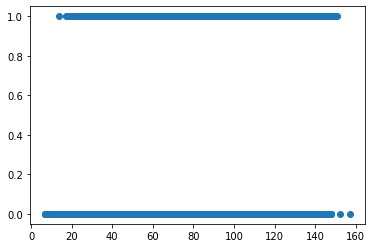

In [ ]:
plt.scatter(tl,df["target"]);

Print the number of null values in each column

In [ ]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Remove the null values

In [ ]:
df = df.dropna()

Remove:


1.   Double Spaces
2.   Hypens and arrows
3.   Emojis
4.   URL
5.   Any other non english or special symbol

Replace wrong spellings with correct spellings



In [ ]:
df=df.replace({'  ':''}, regex=True)
df=df.replace({'-':''}, regex=True)
df=df.replace({'=>':''}, regex=True)

In [ ]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df["text"] = df["text"].apply(lambda text: remove_emoji(text))

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["text"] = df["text"].apply(lambda text: remove_urls(text))
df.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze,1
32,49,ablaze,Est. September 2012 Bristol,We always try to bring the heavy. #metal #RT,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [ ]:
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
  string = ''
  for i in text:
    if (i >= 'A' and i <= 'Z') or (i >= 'a' and i <= 'z') or (i == ' '):
      string += i
  return string


df["text"] = df["text"].apply(lambda text: remove_punctuation(text))

df=df.replace({'  ':' '}, regex=True)
df.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,bbcmtd Wholesale Markets ablaze,1
32,49,ablaze,Est. September 2012 Bristol,We always try to bring the heavy metal RT,0
33,50,ablaze,AFRICA,AFRICANBAZE Breaking newsNigeria flag set abla...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


In [ ]:
!pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
df["text"] = df["text"].apply(lambda text: correct_spellings(text))

In [ ]:
df.head()

,id,keyword,location,text,target
31,48,ablaze,Birmingham,bbcmtd Wholesale Markets ablaze,1
32,49,ablaze,Est. September 2012 Bristol,We always try to bring the heavy metal RT,0
33,50,ablaze,AFRICA,AFRICANBAZE Breaking newsNigeria flag set abla...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


Plot a word cloud of real target and fake target

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off");
j = 0
real_target = ''
fake_target = ''
for i in df["text"]:
  if (df["target"][j:j+1].item() == 1):
    real_target += i
  else:
    fake_target += i
  j+=1

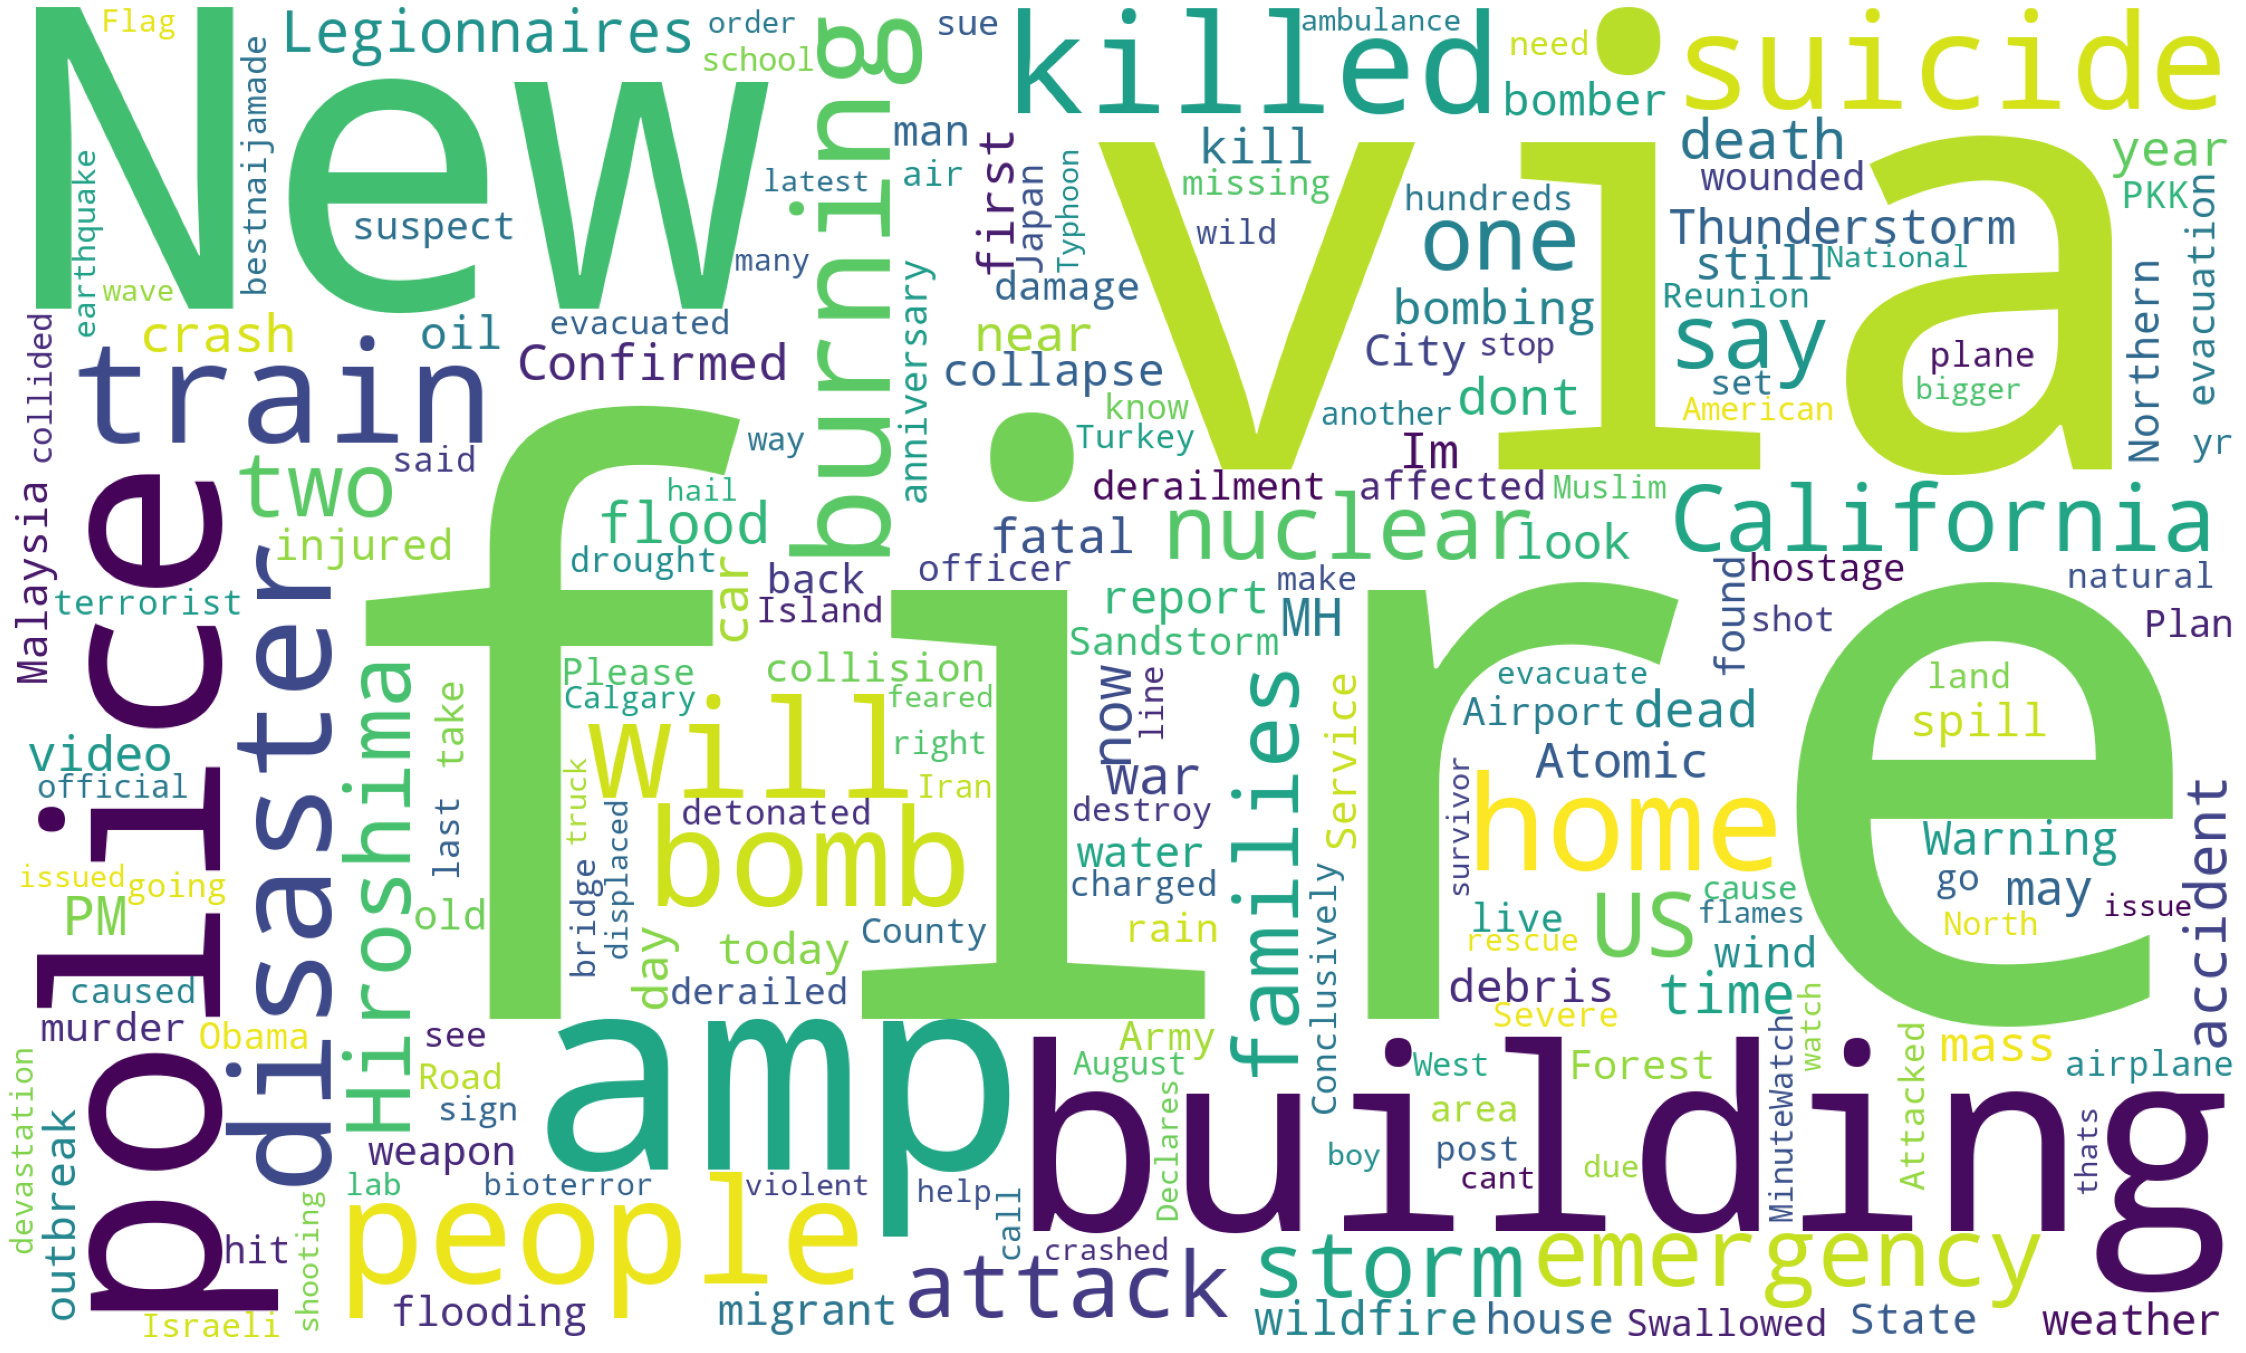

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 2000, height = 1200, random_state=1, background_color="white", collocations=False, stopwords = STOPWORDS).generate(real_target)
plot_cloud(wordcloud)

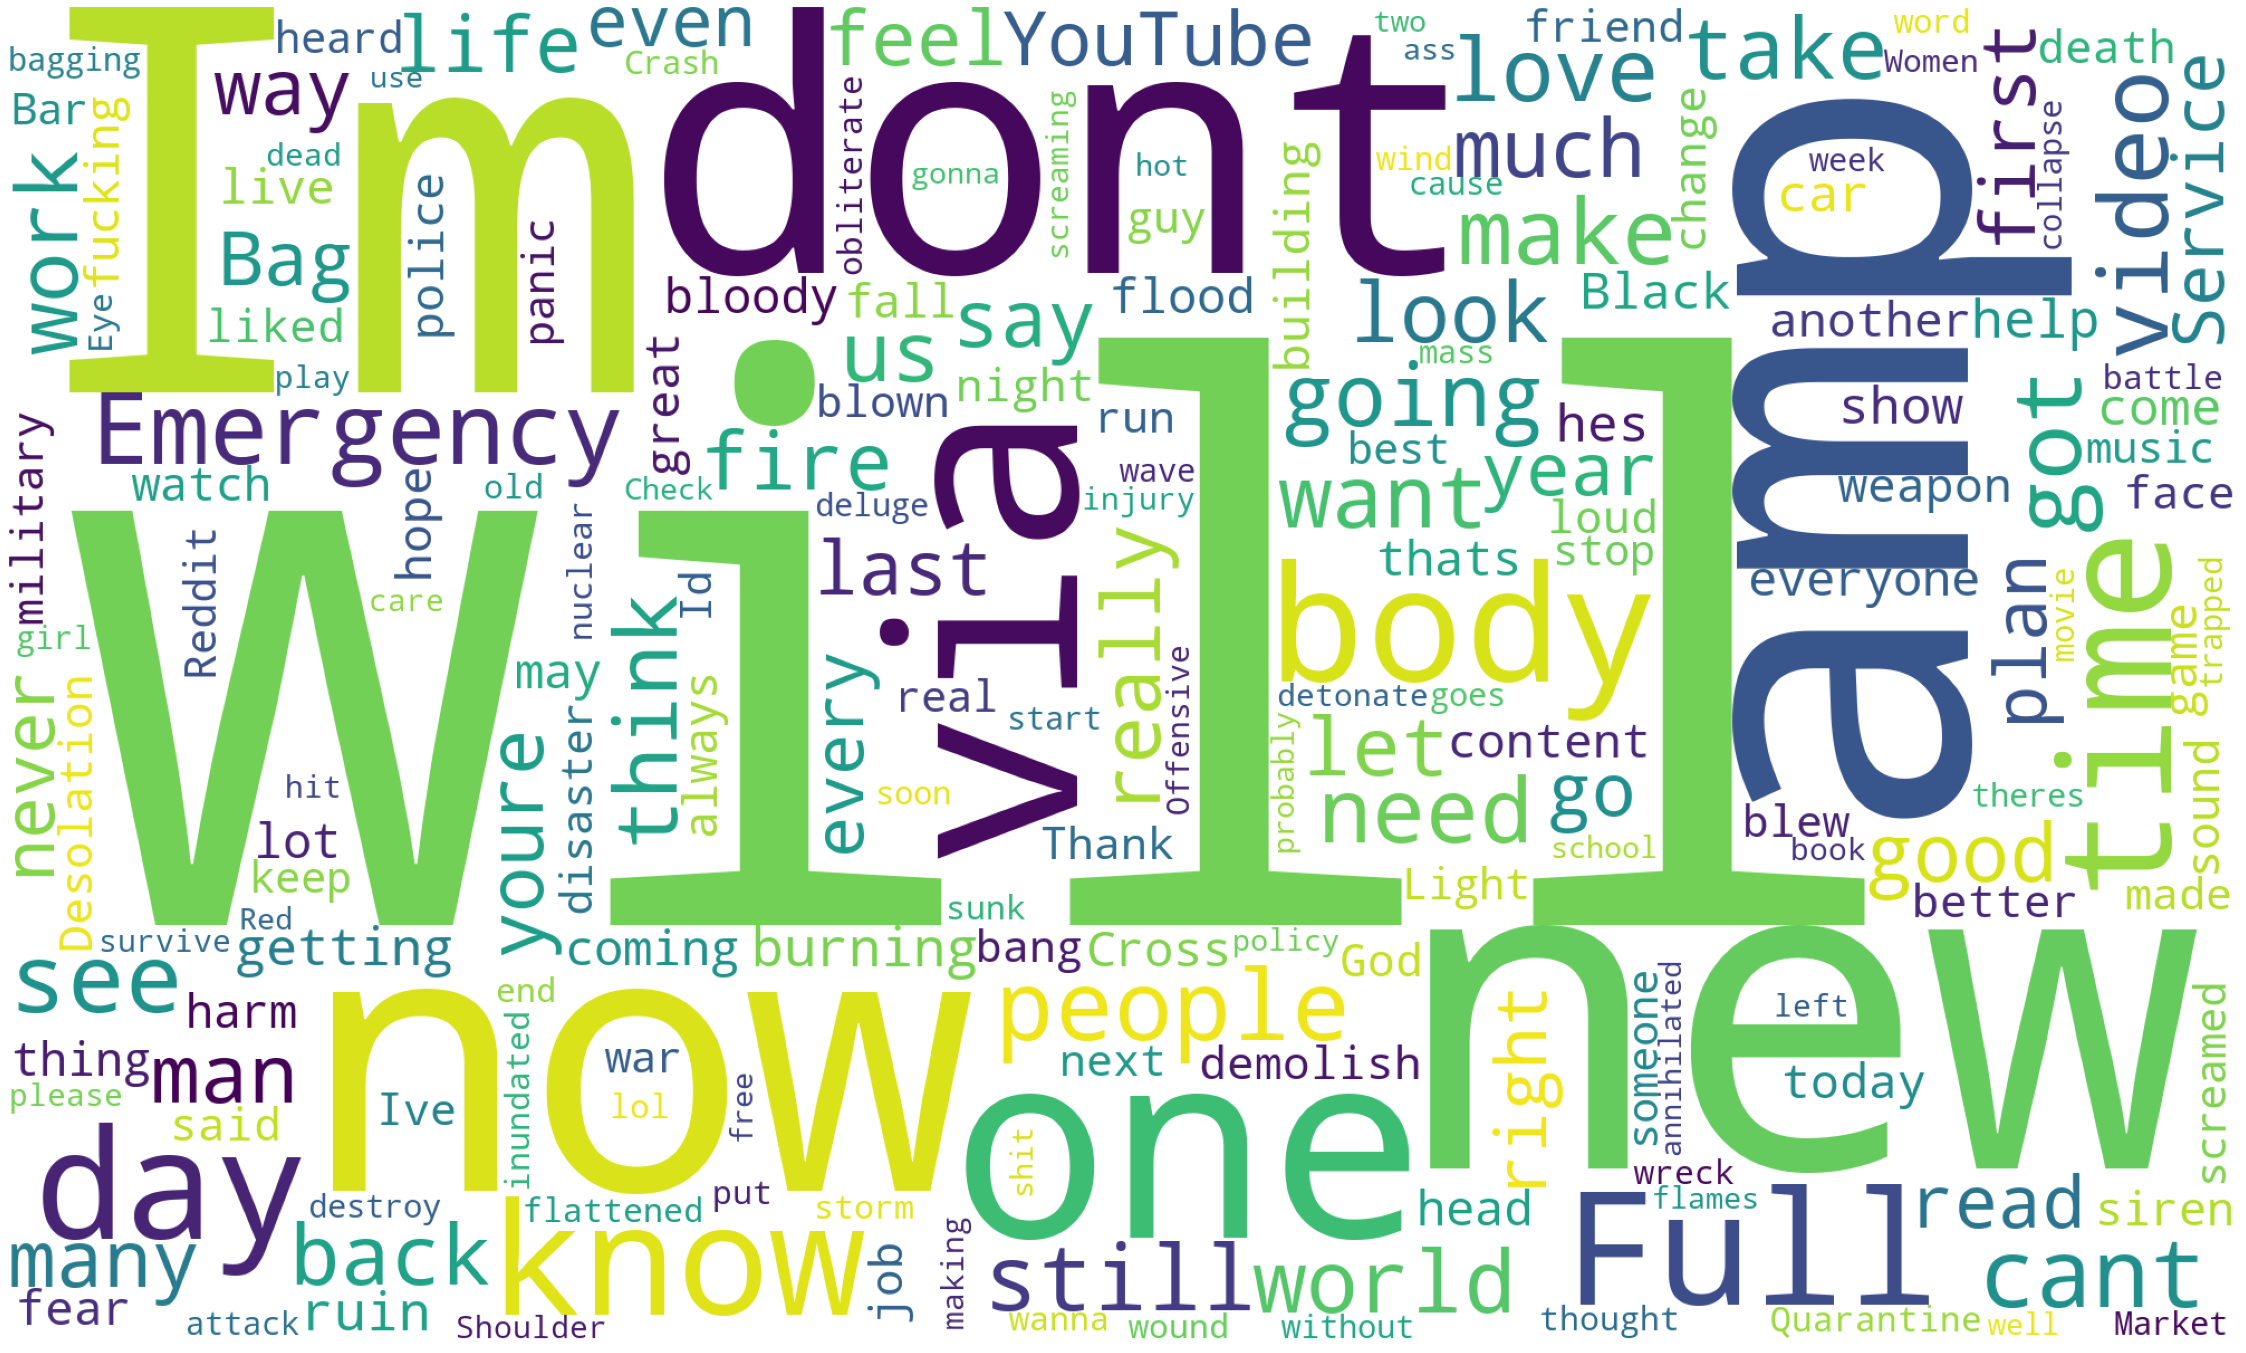

In [ ]:
wordcloud2 = WordCloud(width = 2000, height = 1200, random_state=1, background_color="white", collocations=False, stopwords = STOPWORDS).generate(fake_target)
plot_cloud(wordcloud2)

Keep only text and target column in the dataset

In [ ]:
del df["id"]
del df["location"]
del df["keyword"]
df

,text,target
31,bbcmtd Wholesale Markets ablaze,1
32,We always try to bring the heavy metal RT,0
33,AFRICANBAZE Breaking newsNigeria flag set abla...,1
34,Crying out for more Set me ablaze,0
35,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
...,...,...
7575,On the bright side I wrecked,0
7577,wadda Hes gone You can relax I thought the wif...,0
7579,Three days off from work and theyve pretty muc...,0
7580,FX fore trading Cramer Igers words that wrecke...,0


Split data into train and validation

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test, = train_test_split(df,test_size=0.2)

Print the count of unique words

In [ ]:
text_string = ''
for i in df["text"]:
  text_string += i

In [ ]:
print("Unique words in complete dataset: ",len(set(text_string.split())))

Unique words in complete dataset:  17989


Compute the Term-Document Matrix (TDM) for all classes.


Print the dataframe with number of columns = number of unique words and the row showing the count of that word in a sentence.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
stt = [row['text'] for index,row in df_train.iterrows() if row['target'] == 0]

vec_0 = CountVectorizer()
X_0 = vec_0.fit_transform(stt)
tdm_0 = pd.DataFrame(X_0.toarray(), columns=vec_0.get_feature_names())

tdm_0

,aaaa,aannnnd,aar,aaronthefm,aba,abandon,abbott,abbruchsimulator,abc,abceyewitness,aberdeen,aberdeenfanpage,aberdeenfc,ability,abject,ablaze,able,abomination,about,above,absolutely,absolutsumya,abstract,absurdly,abuse,abused,abuseddesolateamplost,abysmaljoiner,acarewornheart,accept,accepts,access,accident,accidentalprophecy,accidently,accidents,accompanying,according,account,accused,...,young,youngheroesid,youngsafe,your,youre,yours,yourself,youssefyamani,youth,youthdid,youtube,youve,yrs,yuan,yukis,yum,yup,yuppies,zach,zaire,zakbagans,zamtriossu,zar,zarharzar,zarry,zayn,zenandemcfen,zenit,zepp,zero,zhenghxn,zimbabwe,zip,zippoline,zodiac,zombie,zone,zoom,zouma,zss
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2303,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2304,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
qtt = [row['text'] for index,row in df_train.iterrows() if row['target'] == 1]
vec_1 = CountVectorizer()
X_1 = vec_1.fit_transform(qtt)
tdm_1 = pd.DataFrame(X_1.toarray(), columns=vec_1.get_feature_names())

tdm_1

,aa,aaaaaaallll,aashiqui,aba,abandon,abandoned,abbswinston,abc,abcchicago,abcnews,abcnorio,abcs,abe,abes,abia,ablaze,able,abninfvet,abomb,abombed,abortion,about,above,absurd,abuse,abuseddesolateamplost,abuses,abusing,ac,acc,accept,accident,accidentally,accidentman,accidents,accidentwho,according,account,accounts,accused,...,yougov,youll,young,younger,youngheroesid,your,youre,yours,yourself,yourselves,yourstate,youth,youtube,youve,ypg,ypres,yr,yrs,yug,yycfringe,yycstorm,yycwalks,yzf,zaatari,zaibatsunews,zakbagans,zakuun,zaman,zaynmaiikist,zergele,zimmer,zimpapersviews,zionism,zionist,zkesk,zojadelin,zomatoaus,zone,zones,zotar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1754,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
stmt_do = [row['text'] for index,row in df_train.iterrows()]

vec = CountVectorizer()
X = vec.fit_transform(stmt_do)
tdm = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

tdm

,aa,aaaa,aaaaaaallll,aannnnd,aar,aaronthefm,aashiqui,aba,abandon,abandoned,abbott,abbruchsimulator,abbswinston,abc,abcchicago,abceyewitness,abcnews,abcnorio,abcs,abe,aberdeen,aberdeenfanpage,aberdeenfc,abes,abia,ability,abject,ablaze,able,abninfvet,abomb,abombed,abomination,abortion,about,above,absolutely,absolutsumya,abstract,absurd,...,yycstorm,yycwalks,yzf,zaatari,zach,zaibatsunews,zaire,zakbagans,zakuun,zaman,zamtriossu,zar,zarharzar,zarry,zayn,zaynmaiikist,zenandemcfen,zenit,zepp,zergele,zero,zhenghxn,zimbabwe,zimmer,zimpapersviews,zionism,zionist,zip,zippoline,zkesk,zodiac,zojadelin,zomatoaus,zombie,zone,zones,zoom,zotar,zouma,zss
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4060,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4062,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Frequency of words in class 0 and 1

In [ ]:
word_list0 = vec_0.get_feature_names();    
count_list0 = X_0.toarray().sum(axis=0) 
freq0 = dict(zip(word_list0,count_list0))
freq0

{'aaaa': 1,
 'aannnnd': 1,
 'aar': 1,
 'aaronthefm': 1,
 'aba': 6,
 'abandon': 2,
 'abbott': 1,
 'abbruchsimulator': 1,
 'abc': 1,
 'abceyewitness': 1,
 'aberdeen': 1,
 'aberdeenfanpage': 1,
 'aberdeenfc': 1,
 'ability': 1,
 'abject': 1,
 'ablaze': 9,
 'able': 5,
 'abomination': 1,
 'about': 81,
 'above': 1,
 'absolutely': 6,
 'absolutsumya': 1,
 'abstract': 1,
 'absurdly': 1,
 'abuse': 3,
 'abused': 1,
 'abuseddesolateamplost': 1,
 'abysmaljoiner': 1,
 'acarewornheart': 1,
 'accept': 1,
 'accepts': 1,
 'access': 1,
 'accident': 9,
 'accidentalprophecy': 1,
 'accidently': 1,
 'accidents': 2,
 'accompanying': 1,
 'according': 4,
 'account': 3,
 'accused': 2,
 'accuses': 3,
 'accustomed': 2,
 'acebabes': 1,
 'acesse': 1,
 'achieve': 1,
 'achievement': 1,
 'aching': 1,
 'acoustic': 1,
 'acquisitions': 1,
 'across': 5,
 'act': 4,
 'actavis': 1,
 'acted': 1,
 'acting': 1,
 'action': 3,
 'actions': 2,
 'activate': 1,
 'activated': 2,
 'active': 1,
 'activities': 1,
 'activity': 2,
 'actor': 

In [ ]:
word_list1 = vec_1.get_feature_names();    
count_list1 = X_1.toarray().sum(axis=0) 
freq1 = dict(zip(word_list1,count_list1))
freq1

{'aa': 1,
 'aaaaaaallll': 1,
 'aashiqui': 1,
 'aba': 4,
 'abandon': 1,
 'abandoned': 6,
 'abbswinston': 4,
 'abc': 7,
 'abcchicago': 1,
 'abcnews': 1,
 'abcnorio': 1,
 'abcs': 1,
 'abe': 2,
 'abes': 1,
 'abia': 2,
 'ablaze': 11,
 'able': 3,
 'abninfvet': 1,
 'abomb': 2,
 'abombed': 1,
 'abortion': 1,
 'about': 33,
 'above': 2,
 'absurd': 1,
 'abuse': 1,
 'abuseddesolateamplost': 1,
 'abuses': 1,
 'abusing': 2,
 'ac': 1,
 'acc': 1,
 'accept': 1,
 'accident': 39,
 'accidentally': 3,
 'accidentman': 1,
 'accidents': 3,
 'accidentwho': 1,
 'according': 2,
 'account': 5,
 'accounts': 1,
 'accused': 1,
 'accuses': 1,
 'acebreakingnews': 1,
 'achedin': 1,
 'acid': 2,
 'acquire': 1,
 'acquired': 1,
 'acres': 7,
 'across': 7,
 'act': 6,
 'acted': 1,
 'acting': 1,
 'action': 5,
 'actions': 3,
 'activated': 1,
 'activates': 2,
 'activist': 1,
 'activity': 2,
 'actress': 1,
 'acts': 2,
 'actually': 7,
 'acute': 2,
 'adamtuss': 1,
 'add': 2,
 'added': 3,
 'address': 1,
 'adjust': 1,
 'adjustable': 

Does the sum of the unique words in target 0 and 1 sum upto the total number of unique words in the whole document? Why or why not? Explain in report.

In [ ]:
j = 0
target0 = ''
target1 = ''
for i in df_train["text"]:
  if (df_train["target"][j:j+1].item() == 1):
    target1 += i
  else:
    target0 += i
  j+=1

def counte(str):
    str = str.split()         
    str2 = []
    for i in str:
        if i not in str2:
            str2.append(i)
    return len(str2)
t0 = counte(target0)
print("Unique words in class 0: ", t0)

t1 = counte(target1)
print("Unique words in class 1: ", t1)


Unique words in class 0:  10099
Unique words in class 1:  7766


Total frequency

In [ ]:
print("Sum of unique words in class 0 and class 1: ", t0+t1)
text_string = ''
for i in df_train["text"]:
  text_string += i
t3 = len(set(text_string.split()))
print("Total unique words in whole document: ", t3)

Sum of unique words in class 0 and class 1:  17865
Total unique words in whole document:  15381


Calculate the probability for each word in a given class.

Class 0

In [ ]:
probo0 = []
for word, count in zip(word_list0,count_list0):
  probo0.append(count/len(word_list0))
dict(zip(word_list0,probo0))

{'aaaa': 0.00012671059300557527,
 'aannnnd': 0.00012671059300557527,
 'aar': 0.00012671059300557527,
 'aaronthefm': 0.00012671059300557527,
 'aba': 0.0007602635580334517,
 'abandon': 0.00025342118601115053,
 'abbott': 0.00012671059300557527,
 'abbruchsimulator': 0.00012671059300557527,
 'abc': 0.00012671059300557527,
 'abceyewitness': 0.00012671059300557527,
 'aberdeen': 0.00012671059300557527,
 'aberdeenfanpage': 0.00012671059300557527,
 'aberdeenfc': 0.00012671059300557527,
 'ability': 0.00012671059300557527,
 'abject': 0.00012671059300557527,
 'ablaze': 0.0011403953370501775,
 'able': 0.0006335529650278763,
 'abomination': 0.00012671059300557527,
 'about': 0.010263558033451596,
 'above': 0.00012671059300557527,
 'absolutely': 0.0007602635580334517,
 'absolutsumya': 0.00012671059300557527,
 'abstract': 0.00012671059300557527,
 'absurdly': 0.00012671059300557527,
 'abuse': 0.0003801317790167258,
 'abused': 0.00012671059300557527,
 'abuseddesolateamplost': 0.00012671059300557527,
 'aby

Class 1

In [ ]:
probo1 = []
for count in count_list1:
  probo1.append(count/len(word_list1))
dict(zip(word_list1,probo1))

{'aa': 0.00016627868307283005,
 'aaaaaaallll': 0.00016627868307283005,
 'aashiqui': 0.00016627868307283005,
 'aba': 0.0006651147322913202,
 'abandon': 0.00016627868307283005,
 'abandoned': 0.0009976720984369804,
 'abbswinston': 0.0006651147322913202,
 'abc': 0.0011639507815098104,
 'abcchicago': 0.00016627868307283005,
 'abcnews': 0.00016627868307283005,
 'abcnorio': 0.00016627868307283005,
 'abcs': 0.00016627868307283005,
 'abe': 0.0003325573661456601,
 'abes': 0.00016627868307283005,
 'abia': 0.0003325573661456601,
 'ablaze': 0.0018290655138011307,
 'able': 0.0004988360492184902,
 'abninfvet': 0.00016627868307283005,
 'abomb': 0.0003325573661456601,
 'abombed': 0.00016627868307283005,
 'abortion': 0.00016627868307283005,
 'about': 0.005487196541403392,
 'above': 0.0003325573661456601,
 'absurd': 0.00016627868307283005,
 'abuse': 0.00016627868307283005,
 'abuseddesolateamplost': 0.00016627868307283005,
 'abuses': 0.00016627868307283005,
 'abusing': 0.0003325573661456601,
 'ac': 0.0001

We have calculated the probability of occurrence of word in a class, we can now substitute the values in the Baye's equation. 

If a word from the new sentence does not occur in the class within the training set, the equation becomes zero. This problem can be solved using smoothing like Laplace smoothing. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

docs = [row['text'] for index,row in df_train.iterrows()]

vec = CountVectorizer()
X = vec.fit_transform(docs)

total_features = len(vec.get_feature_names())
total_features

11401

In [ ]:
total_cnts_f0 = count_list0.sum(axis=0)
total_cnts_f1 = count_list1.sum(axis=0)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Probability for class 0

In [ ]:
def pb0(new_word_list):
  product0 = 1
  probo0_ls = []
  for word in new_word_list:
      if word in freq0.keys():
          count = freq0[word]
      else:
          count = 0
      probo0_ls.append((count + 1)/(total_cnts_f0 + total_features))
      product0 *= (count + 1)/(total_cnts_f0 + total_features)
  return product0

Probability for class 1

In [ ]:
def pb1(new_word_list):
  product1 = 1
  probo1_ls = []
  for word in new_word_list:
      if word in freq1.keys():
          count = freq1[word]
      else:
          count = 0
      probo1_ls.append((count + 1)/(total_cnts_f1 + total_features))
      product1 *= (count + 1)/(total_cnts_f1 + total_features)
  return product1

Print target class

In [ ]:
from nltk.tokenize import word_tokenize
pred = []
for i in df_test["text"]:
  new_word_list = word_tokenize(i)
  p1 = pb1(new_word_list)
  p0 = pb0(new_word_list)
  p1 = p1*((3271)/7613)
  p0 = p0*((4342)/7613)
  if p0>p1 :
    pred.append(0)
  else:
    pred.append(1)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test["target"].to_numpy(),pred)

array([[388, 189],
       [ 88, 351]])

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(df_test["target"].to_numpy(),pred, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.650


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(df_test["target"].to_numpy(),pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.800


In [48]:
from sklearn.metrics import f1_score
score = f1_score(df_test["target"].to_numpy(),pred, average='binary')
print('F1-score: %.3f' % score)

F1-score: 0.717


References:

[Ref1](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)